   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   total_bedrooms_scaled  median_income_scaled  
0              -0.9

<ipython-input-1-f1f43f7964b4>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace=True))


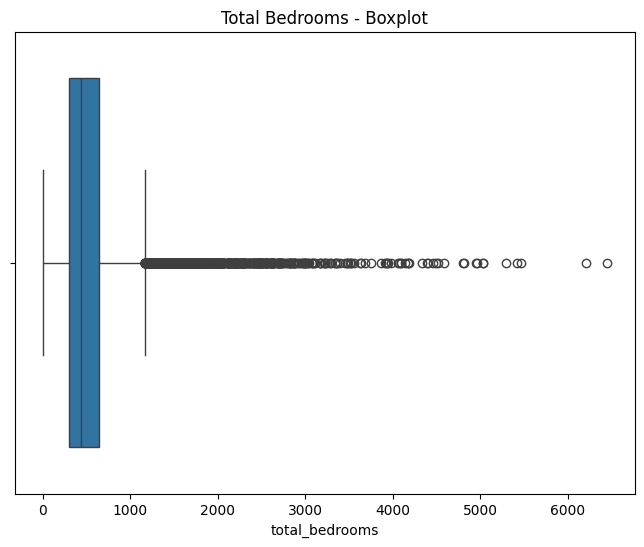

Aykırı değerler temizlendi! 1306 satır silindi.


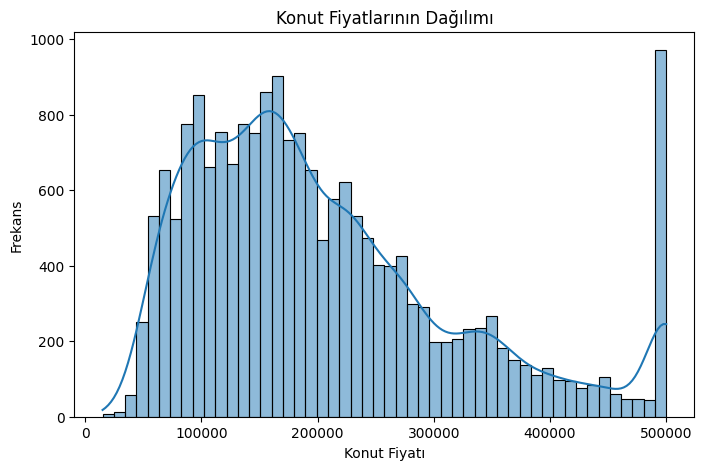

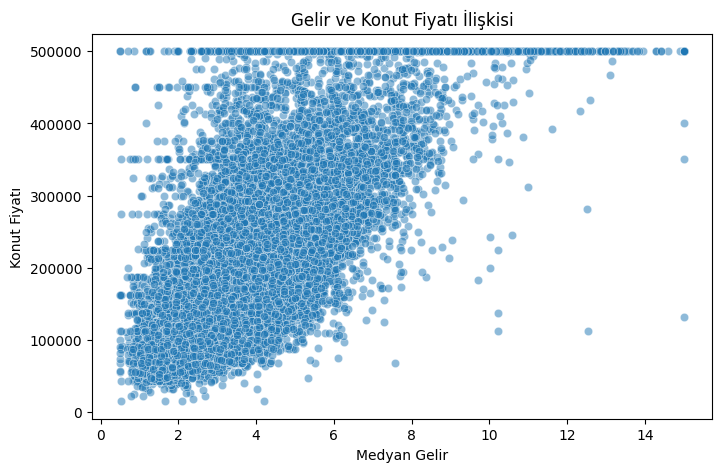

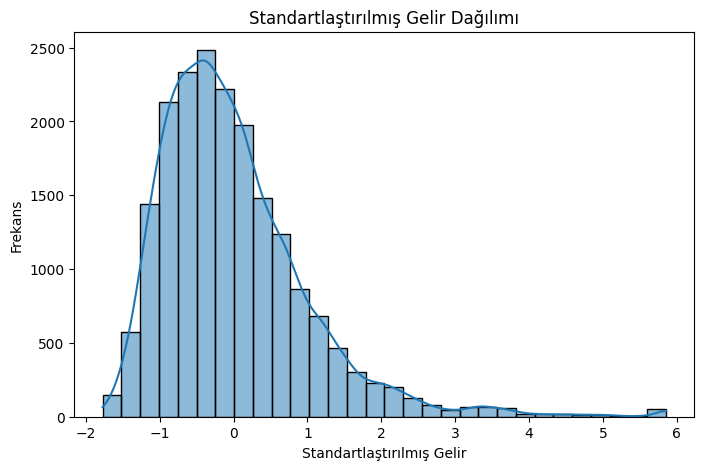

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Veri setini yükleme
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")


scaler = StandardScaler()

# Total Bedrooms ve Median Income sütunlarını standartlaştıralım
df["total_bedrooms_scaled"] = scaler.fit_transform(df[["total_bedrooms"]])
df["median_income_scaled"] = scaler.fit_transform(df[["median_income"]])


# veri seti incelendi ilk beş satır kontrol edildi eksik değer analizi yapıldı ihtiyaç halinde total_bedrooms'un çıkarılmasına karar verildi.
def analysis(df):
    print(df.head())
    print('-------------------------------')
    print(df.describe())
    print('-------------------------------')
    print(df.info())
    print('-------------------------------')
    print(df.isnull().sum())
    print('-------------------------------')
    print(df.info())
    print('-------------------------------')
    return df

analysis(df)

# eksik değerin sayısal bir değer olduğu ve bu eksik değerleri sütunun ortalama değerini alarak analizimi etklimeseni ekarde ederek yolumuza koyulmak için fonksiyon yazıldı.
# isnull().sum() ile tekrar kontrol sağlanacak
def fill_int_the_blanks(df):
    print(df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace=True))
    print(df.isnull().sum())
    return df

fill_int_the_blanks(df)


# Kutunun içindeki alan verilerin %50'sini (Q1 - Q3) temsil eder.
# Üst ve alt çizgiler minimum ve maksimum normal değerleri gösterir.
# Kutunun dışındaki noktalar aykırı değerlerdir.
def visualization():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df["total_bedrooms"])
    plt.title("Total Bedrooms - Boxplot")
    plt.show()

visualization()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1. çeyrek
    Q3 = df[column].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1  # IQR hesaplama
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır

    # Aykırı değerleri filtrele
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Aykırı değerler temizlendi! {len(df) - len(df_clean)} satır silindi.")
    return df_clean

# Kullanım
df = remove_outliers_iqr(df, "total_bedrooms")

# konut fiyatlarının (median_house_value) dağılımını histogram ile görselleştirelim:
def konutdagılımı():
    plt.figure(figsize=(8, 5))
    sns.histplot(df["median_house_value"], bins=50, kde=True)
    plt.xlabel("Konut Fiyatı")
    plt.ylabel("Frekans")
    plt.title("Konut Fiyatlarının Dağılımı")
    plt.show()

konutdagılımı()

# scatter plot kullanarak gelir (median_income) ile konut fiyatı (median_house_value) arasındaki ilişkiyi inceleyelim:
def gelir_ve_ev_fiyatı_iliskisi():
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df["median_income"], y=df["median_house_value"], alpha=0.5)
    plt.xlabel("Medyan Gelir")
    plt.ylabel("Konut Fiyatı")
    plt.title("Gelir ve Konut Fiyatı İlişkisi")
    plt.show()

gelir_ve_ev_fiyatı_iliskisi()

# standartlaştırılmış median_income_scaled değişkenini histogram ile inceleyelim:
def standarlastırılmıs_gelir_dagılımı():
    plt.figure(figsize=(8, 5))
    sns.histplot(df["median_income_scaled"], bins=30, kde=True)
    plt.xlabel("Standartlaştırılmış Gelir")
    plt.ylabel("Frekans")
    plt.title("Standartlaştırılmış Gelir Dağılımı")
    plt.show()

standarlastırılmıs_gelir_dagılımı()

#Aykırı Değerler Temizlenmeden Önceki Durum

#Aykırı değerleri temizlemeden önce, özellikle şu problemleri fark ettik:

# Toplam Yatak Odası Sayısı (total_bedrooms)

    #Bazı eksik değerler vardı
    #Veri setinde, yatak odası sayısı ortalamanın çok üstünde olan evler bulunuyordu.

#Aykırı Değerler Temizlendikten Sonraki Durum

    #total_bedrooms sütunundaki eksik değerleri ortalama ile doldurduk ve analizler hatasız hale geldi.

#Sonuç ve İçgörüler

    #Temizlenmiş veriyle yapılan analizler daha güvenilir hale geldi.
    #Eksik verilerin tamamlanması ile analizlerde hata oranı azaldı.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')